In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

train_batch_size = 100
test_batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

#temp = torch.tensor(np.random.randint(0, 10, (len(trainset),)))
#trainset.targets = temp.tolist()
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False)

In [39]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 128)  
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  

    def forward(self, x):
        x = x.view(-1, 28 * 28 * 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x


model = DNNModel()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_function = torch.nn.CrossEntropyLoss()

In [40]:
def train_model(model, train_loader):
    tolerance = 1e-5
    complete_weights_first_layer, complete_weights_full_model, complete_losses = [], [], []

    for t_i in range(8):
        weights_first_layer, weights_full_model, losses = [], [], []
        model = DNNModel()
        print("Training time: "+str(t_i+1))
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
        loss_function = torch.nn.CrossEntropyLoss()
        for epoch in range(24):
            for inputs, labels in train_loader:
                optimizer.zero_grad()                
                outputs = model(inputs)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()

            if epoch % 3 == 0:
                weights_first_layer.append(model.fc1.weight.data.numpy().flatten())  
                full_model_weights = np.concatenate([param.data.numpy().flatten() for param in model.parameters()])
                weights_full_model.append(full_model_weights)
                losses.append(loss.item())

        complete_weights_first_layer.append(weights_first_layer)
        complete_weights_full_model.append(weights_full_model)
        complete_losses.append(losses)
        
    return complete_weights_first_layer, complete_weights_full_model, complete_losses

first_layer_model_weights, full_model_weights, model_losses = train_model(model, trainloader)

Training time: 1
Training time: 2
Training time: 3
Training time: 4
Training time: 5
Training time: 6
Training time: 7
Training time: 8


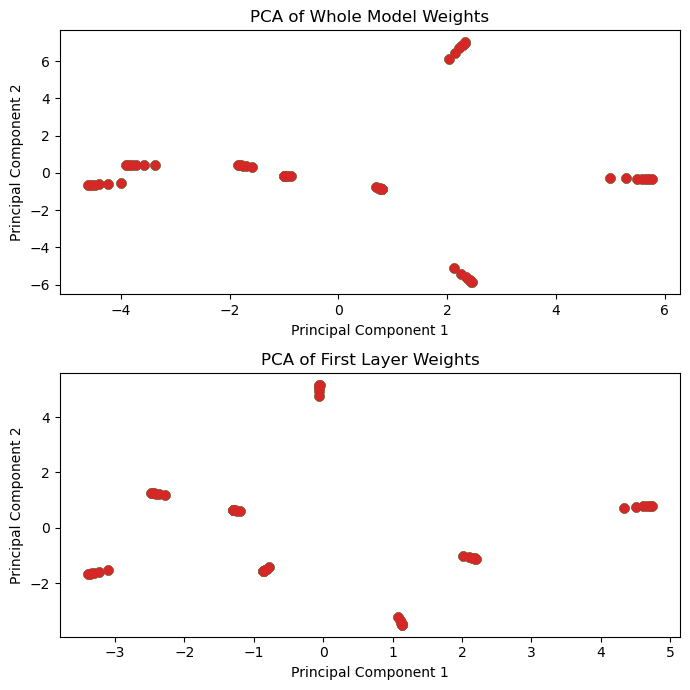

In [46]:
weights_full_model_flat = np.vstack(full_model_weights)
full_model_pca = PCA(n_components=2)
weights_full_model_pca = full_model_pca.fit_transform(weights_full_model_flat)

weights_first_layer_flat = np.vstack(first_layer_model_weights)
first_layer_pca = PCA(n_components=2)
weights_first_layer_pca = first_layer_pca.fit_transform(weights_first_layer_flat)

plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
for i in range(len(weights_full_model_pca)):  
    plt.scatter(weights_full_model_pca[:, 0], weights_full_model_pca[:, 1])
plt.title('PCA of Whole Model Weights')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(2, 1, 2)
for i in range(len(weights_first_layer_pca)):  
    plt.scatter(weights_first_layer_pca[:, 0], weights_first_layer_pca[:, 1])
plt.title('PCA of First Layer Weights')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()